# Restroom Redoubt

In [148]:
import re
import numpy as np

## Part 1

In [2]:
def parse_input(sample=True, file_path="Restroom_Redoubt.txt", mode="r"):
	if sample:
		file_path = "sample.txt"
	
	with open(file_path, mode) as file:
		data = file.read().splitlines()

	return data

In [3]:
def extract_pos_vel(data):
	robots = []
	pattern = (
		r"p=(-?\d+),(-?\d+) v=(-?\d+),(-?\d+)"
	)
	for line in data:
		match = re.match(pattern, line)
		if match:
			current_bot = ([int(x) for x in match.groups()])

		robots.append(current_bot)

	return robots

In [4]:
def simulate_movement(robots, seconds=100, tiles_dim=(11, 7)):
	
	for t in range(seconds):
		for bot in robots:
			x, y = bot[:2]
			vx, vy = bot[2:]
			x = (x + vx) % tiles_dim[0]
			y = (y + vy) % tiles_dim[1]
			bot[:2] = [x, y]
		
	return robots

In [5]:
def divide_robots_by_quadrant(robots, tiles_dim=(11, 7)):
	
	# Mid points
	mid_x = tiles_dim[0]//2
	mid_y = tiles_dim[1]//2

	# Quadrants: q1, q2, q3, q4
	q1 = []
	q2 = []
	q3 = []
	q4 = []

	for bot in robots:
		x, y = bot[:2]
		if x < mid_x and y < mid_y:
			q1.append(bot)
		elif x > mid_x and y < mid_y:
			q2.append(bot)
		elif x < mid_x and y > mid_y:
			q3.append(bot)
		elif x > mid_x and y > mid_y:
			q4.append(bot)

	return q1, q2, q3, q4

In [6]:
def count_multiply_by_quadrant(robots, tiles_dim=(11, 7)):
	q1, q2, q3, q4 = divide_robots_by_quadrant(robots, tiles_dim=tiles_dim)
	return len(q1) * len(q2) * len(q3) * len(q4)

In [7]:
def part1(sample=False, time=100, tiles_dim=(101, 103)):
	
	data = parse_input(sample=sample)
	
	if sample:
		tiles_dim = (11, 7)
	
	robots = extract_pos_vel(data)
	robots = simulate_movement(robots, seconds=time, tiles_dim=tiles_dim)
	result = count_multiply_by_quadrant(robots, tiles_dim=tiles_dim)

	return result

In [8]:
part1(sample=False)

215476074

## Part 2

In [9]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [19]:
def robot_pos_at_t(robots, time=100):
	robots_pos_t = []
	for t in range(time):
		current_time_pos = []
		for bot in robots:
			x, y = bot[:2]
			vx, vy = bot[2:]
			x = (x + vx) % 101
			y = (y + vy) % 103
			bot[:2] = [x, y]
			current_time_pos.append((x, y))
		
		robots_pos_t.append(current_time_pos)
		return robots_pos_t

Min Y variance at t=2
Min X variance at t=23
Min Y variance at t=105
Min X variance at t=124
Min Y variance at t=208


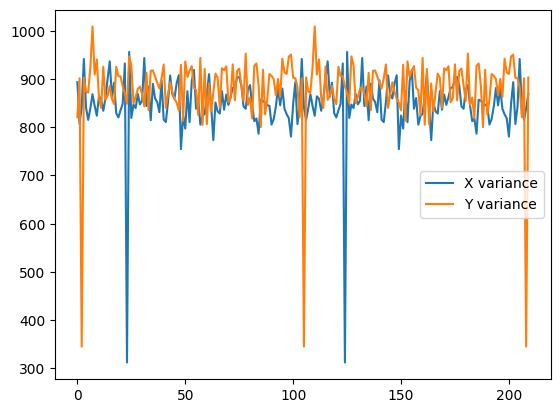

In [150]:
data = parse_input(sample=False)
robots = extract_pos_vel(data)

X, Y = [], []
DX, DY = [], []
for bot in robots:
	x, y = bot[:2]
	X.append(x)
	Y.append(y)

	dx, dy = bot[2:]
	DX.append(dx)
	DY.append(dy)

X_var, Y_var = [], []

time = 210
for i in range(time):

	X_var.append(np.var(X))
	Y_var.append(np.var(Y))

	if X_var[-1] < 400:
		print(f"Min X variance at t={i}")
		min_x_var = i

	if Y_var[-1] < 400:
		print(f"Min Y variance at t={i}")
		min_y_var = i


	X = [(x + dx) % 101 for x, dx in zip(X, DX)]
	Y = [(y + dy) % 103 for y, dy in zip(Y, DY)]

plt.plot(X_var, label="X variance")
plt.plot(Y_var, label="Y variance")
plt.legend()

## Notes

X and Y variance minimums area at 

\begin{align*}
	t_x = x_0 + n_x \cdot R_x \\
	t_y = y_0 + n_y \cdot R_y
\end{align*}

Equivalently, the minimums are at:

\begin{align*}
	t_x = x_0 \hspace{1em} (\text{ mod } R_x) \\
	t_y = y_0 \hspace{1em} (\text{ mod } R_y)
\end{align*}

where: $x_0$ and $y_0$ are the first instant where x and y has a minimum in variance, respectively; $n_x$ and $n_y$ are integers.

When the picture appears, there is minimum in both, simultaneously.

\begin{align*}
	t_x &= t_y \\
	x_0 + n_x \cdot R_x &= y_0 + n_y \cdot R_y \\
	x_0 - y_0 &= n_y \cdot R_y - n_x \cdot R_x
\end{align*}

In [130]:
W = 101
H = 103
bx = min_x_var
by = min_y_var

t = min_x_var + (51*(min_y_var - min_x_var) % H)*W
t

6285

In [129]:
bx+((pow(W, -1, H)*(by-bx)) % H)*W

6285

In [107]:
def obtain_robot_position_at_t(robots, t):
	
	robots_pos_t = []
	for bot in robots:
		x, y = bot[:2]
		vx, vy = bot[2:]
		x = (x + vx*t) % 101
		y = (y + vy*t) % 103
		robots_pos_t.append((x, y))

	return robots_pos_t

In [137]:
data = parse_input(sample=False)
robots = extract_pos_vel(data)

time = 6285

robots_pos = obtain_robot_position_at_t(robots, time)

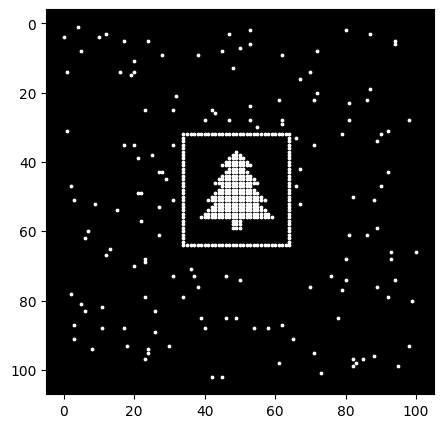

In [145]:
data = parse_input(sample=False)
robots = extract_pos_vel(data)

time = 6285

# time = 1234

robots_pos_t = obtain_robot_position_at_t(robots, time)
X, Y = zip(*robots_pos_t)


plt.figure(figsize=(5, 5))
plt.gca().set_facecolor('black')
plt.scatter(X, Y, c='white', s=3)
plt.gca().invert_yaxis()